# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





In [1]:
from sympy import *
import matplotlib.pyplot as plt

x = Symbol('x')
f = 3*x**2 + 2*x + 2
f # Output result

3*x**2 + 2*x + 2

3*x**2 + 2*x + 2
The true value of the integration is 320.
N: 10, Approximation: 325.000000000000, Error: 5.00000000000000
N: 20, Approximation: 321.250000000000, Error: 1.25000000000000
N: 40, Approximation: 320.312500000000, Error: 0.312500000000000
N: 80, Approximation: 320.078125000000, Error: 0.0781250000000000
N: 160, Approximation: 320.019531250000, Error: 0.0195312500000000
N: 320, Approximation: 320.004882812500, Error: 0.00488281250000000
N: 640, Approximation: 320.001220703125, Error: 0.00122070312500000
N: 1280, Approximation: 320.000305175781, Error: 0.000305175781250000


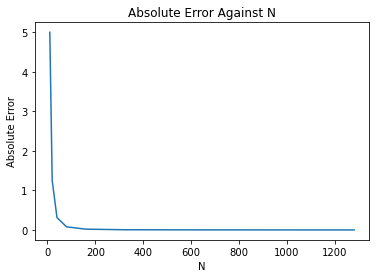

In [2]:
print(f) # Output result again

N = [10, 20, 40, 80, 160, 320, 640, 1280]  # Array of N values
results = []  # Store results of the trapezoidal approximations

actual = integrate(f, (x, -4, 6))  # actual value of integral
print(f"The true value of the integration is {actual}.")

# Trapezoid rule scheme for each value of N
for i in range(len(N)):
    i = N[i]
    delta_x = 10/i
    approx = delta_x * ((Sum((f.subs(x, (-4 + (delta_x * x)))), (x, 1, i - 1)).evalf()) + (((f.subs(x, -4)) + f.subs(x, 6)) * 0.5))
    results.append(approx)

# array of the absolute errors for N values
error = [abs(k - actual) for k in results]

# Print the N value, trapezoidal approximation, and the absolute difference
for i in range(len(N)):
    print(f"N: {N[i]}, Approximation: {results[i]}, Error: {error[i]}")

# Plot the absolute error. against N
plt.plot(N, error)
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Against N')
plt.show()

## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [3]:
import numpy as np
import pandas as pd

towns = ["Hempstead", "Babylon", "Islip", "Brookhaven"] # Column names of DataFrame
rows = ["Population in 2099", "Population in 2300", "Population in 2400"] # Row names of DataFrame
population = np.random.randint(1000, 10001, size = (3,4)) # matrix of random integers

df = pd.DataFrame(population)
df.columns = towns
df.index = rows

print(df) # Print entire DataFrame

print(df["Hempstead"][1]) # The value in the cell of row #1 under the Hempstead column

                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       7612     6632   4708        2226
Population in 2300       1313     2379   5884        6573
Population in 2400       1086     6550   8234        7697
1313


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [4]:
# Turn the csv file into a DataFrame
df = pd.read_csv("https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv")

# Display of the first few rows
df.sort_values('Last Name').head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
67,68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
92,93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
15,16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


In [5]:
# number of customers whose subscription date is in 2021
df[(df['Subscription Date'] > '2020-12-31') & (df['Subscription Date'] < '2022-01-01')].shape[0]

43

## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


Fact: LU and PLU decompositions are not unique.

In [6]:
# PART A

import numpy as np

tol=1e-8  # tolerance

def LUdecomposition(A):
    n = A.shape[0]
    L = np.identity(n)
    U = np.copy(A)

    # Number of columns and rows are different
    if A.shape[0] != A.shape[1]: 
        raise ValueError("This matrix is not a square matrix.")

        
    for k in range(n):
        # Diagonals start with a zero or almost zero number 
        if abs(U[k, k]) < tol:
            raise ValueError("Pure LU decomposition is not possible. Perform row permutations (pivoting).")
            
        # Performing LU Decomposition
        for i in range(k+1, n):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            U[i, k:] -= factor * U[k, k:]

    return L, U

# Random matrices
a1 = np.random.rand(3, 3)
a2 = np.random.rand(3, 3)
a3 = np.random.rand(3, 3)

# Matrices that would raises errors
a4 = np.random.rand(3, 4)
a5 = np.array([[1, 2, 3],[2, 4, 5],[1, 3, 4]], dtype = float)

# Testing the matrices
A = [a1, a2, a3, a4, a5]

for test in A:
    try:
        L, U = LUdecomposition(test)
        LU = np.matmul(L, U)
        truth = np.allclose(test, LU, tol)
        
        # Printing results
        print(f"Matrix A :\n{test}")
        print(f"Matrix L :\n{L}")
        print(f"Matrix U :\n{U}")
        print(f"LU :\n{LU}")
        print(f"Do A and LU closely resemble each other? {truth}")
    
    # Printing errors
    except ValueError as E:
        print(f"{test} has an error: {E}")

Matrix A :
[[0.92153657 0.75881914 0.16483797]
 [0.2477028  0.06240461 0.58298262]
 [0.29842181 0.24179479 0.43787407]]
Matrix L :
[[1.         0.         0.        ]
 [0.26879323 1.         0.        ]
 [0.32383068 0.02779106 1.        ]]
Matrix U :
[[ 9.21536575e-01  7.58819136e-01  1.64837966e-01]
 [-2.77555756e-17 -1.41560835e-01  5.38675292e-01]
 [ 0.00000000e+00  0.00000000e+00  3.69524125e-01]]
LU :
[[0.92153657 0.75881914 0.16483797]
 [0.2477028  0.06240461 0.58298262]
 [0.29842181 0.24179479 0.43787407]]
Do A and LU closely resemble each other? True
Matrix A :
[[0.12284697 0.47116376 0.76107202]
 [0.98771039 0.37219105 0.79187311]
 [0.5456683  0.25453243 0.8146552 ]]
Matrix L :
[[1.         0.         0.        ]
 [8.04016868 1.         0.        ]
 [4.44185384 0.53813931 1.        ]]
Matrix U :
[[ 1.22846974e-01  4.71163756e-01  7.61072020e-01]
 [-1.11022302e-16 -3.41604501e+00 -5.32727430e+00]
 [ 0.00000000e+00  0.00000000e+00  3.00900237e-01]]
LU :
[[0.12284697 0.47116376 0

In [7]:
# PART B

import numpy as np

def pivoting(A):
    n = A.shape[0]
    P = np.identity(n)

    # Pivoting
    for c in range(n):
        r = np.argmax((abs(A[c:, c]))) + c
        if r != c:
            P[[c,r]] = P[[r,c]]

    return P

# Errored Test Matrix 
A_error = np.array([[0, 2, 1], [2, 2, 3], [4, -3, 0]])

# Showing results to ensure error (from Part A)
try:
    L, U = LUdecomposition(A_error)
    LU = np.matmul(L, U)
    truth = np.allclose(test, LU, tol)
        
    print(f"Matrix A :\n{A_error}")
    print(f"Matrix L :\n{L}")
    print(f"Matrix U :\n{U}")
    print(f"LU :\n{LU}")
    print(f"Do A and LU closely resemble each other? {truth}")
        
except ValueError as E:
    print(f"{A_error} has an error: {E}")

# Finding P of test matrix
P = pivoting(A_error)
PA = np.matmul(P, A_error)
L1, U1 = LUdecomposition(PA)
LU1 = np.matmul(L1, U1)
verify = np.allclose(PA, LU1, tol)

# Printing P, L, U, and ensuring that PA = LU
print(f"Matrix P :\n{P}")
print(f"Matrix L :\n{L1}")
print(f"Matrix U :\n{U1}")
print(f"LU :\n{LU1}")
print(f"Does PA = LU? {verify}")

[[ 0  2  1]
 [ 2  2  3]
 [ 4 -3  0]] has an error: Pure LU decomposition is not possible. Perform row permutations (pivoting).
Matrix P :
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Matrix L :
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.5  1.75 1.  ]]
Matrix U :
[[ 4.   -3.    0.  ]
 [ 0.    2.    1.  ]
 [ 0.    0.    1.25]]
LU :
[[ 4. -3.  0.]
 [ 0.  2.  1.]
 [ 2.  2.  3.]]
Does PA = LU? True


## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [8]:
import numpy as np

np.random.seed(6)

# Normalized random 5x5 matrix
P = np.random.rand(5,5)
P = P / P.sum(axis = 1)[:, np.newaxis]

# Normalized random soze-5 vector
p = np.random.rand(5)
p = p / np.sum(p)

# Transition Rule 50 times
p_50 = p
for times in range(50):
    p_50 = np.dot(P.T, p_50)

# Computing eigenvalues and eigenvectors of transpose of P
eigenvalues, eigenvectors = np.linalg.eig(P.T)
evalue = np.argmax(np.isclose(eigenvalues, 1))    # index of eigenvalue closest to 1
v = np.real(eigenvectors[:, evalue])    # corresponding real eigenvector
v_norm = v / np.sum(v)    # normalize to get stationary distribution

# Checking to see if difference of vectors are within 1e-5 of each otehr
diff = np.abs(p_50 - v_norm)
match = np.all(diff < 1e-5)

# Printing results and to check if p50 and the stationary distribution match
print(f"Normalized Matrix P :\n{P}")
print(f"Normalized vector p :\n{p}")
print(f"p50 :\n{p_50}")
print(f"Stationary Distribution :\n{v_norm}")
print(f"Do p50 and the stationary distribution match? {match}")

Normalized Matrix P :
[[0.40669174 0.15121455 0.37406429 0.01899253 0.04903689]
 [0.2378682  0.21179105 0.16741555 0.13407711 0.2488481 ]
 [0.15024016 0.25233644 0.17763642 0.19849255 0.22129442]
 [0.25239508 0.20897102 0.10531946 0.22334905 0.20996539]
 [0.01803302 0.2378947  0.26554723 0.24377701 0.23474804]]
Normalized vector p :
[0.24110049 0.05563527 0.42683213 0.17973501 0.09669711]
p50 :
[0.21496307 0.21234533 0.22298628 0.1588202  0.19088513]
Stationary Distribution :
[0.21496307 0.21234533 0.22298628 0.1588202  0.19088513]
Do p50 and the stationary distribution match? True
